### Definite Integral

Write your own library function to calculate the approximate value of a definite integral.
Test by calculating $\int_{0}^{3\pi/2} \cos(x) dx$ computationally. While there are pre-existing library functions such as ```scipy.integrate``` and ```numpy.trapz```, refrain from using them.

The basic idea is as follows:
1. Start by storing the values of the $cos$ curve in a numpy array periodically (each at a distance of some $dx$ distance from each other).
2. Plot this curve to check if you have got a good approximation of the $cos$ curve.
3. Integrate by calculating the area under the curve. This can be done by breaking the curve into small trapezoids of width $dx$ and summing up their respective areas.

Note that the smaller $dx$ is, the better accuracy we can achieve (you already know this). We will take this value as ```0.01``` radians.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
# Get the curves as arrays
dx = 0.01
x = np.arange(0., 3*np.pi/2, dx)
y = [np.cos(n) for n in x]

Now plot the curve. Try to make the curve as comprehensive as possible so as to use as many ```matplotlib``` functions as possible. You may set the label of the x-coordinate, label of the y-coordinate, a horizontal dotted line to mark $y=0$ and so on in addition to the $cos$ curve.

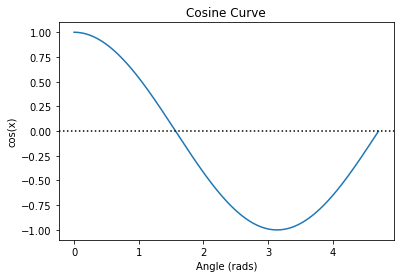

In [3]:
# Plot the curve using matplotlib
plt.plot(x, y)
plt.title('Cosine Curve')
plt.xlabel('Angle (rads)')
plt.ylabel('cos(x)')
plt.axis('tight')
plt.axhline(y=0., linestyle=':', color='k')
plt.show()

In [4]:
def trap_sum(y_low, y_high, dx):
    """ Function to calculate the
        area of a trapezium.
        
        Parameters
        ----------
        y_low: float
            Length of one parallel side.
        y_high: float
            Length of other parallel side.
        dx: float
            Difference between the x_coords
            of y_low and y_high.
            
        Returns
        -------
        area: float
            Area of the trapezium. """
    
    area = dx*(y_low + y_high)/2
    return area

def definite_integral(y, x):
    """ Calculates the approximate value
        of the definite integral of y dx
        
        Parameters
        ----------
        y: numpy.ndarray
            y coordinates of curve
        x: numpy.ndarray
            x coordinates of curve
            
        Returns
        -------
        total_area: float
            Area under y curve
    """
    
    total_area = 0.
    for i in range(len(y) - 1):
        total_area += trap_sum(y[i], y[i+1], dx=0.01)
    
    return total_area

In [5]:
# Calculate value of the integral
definite_integral(y, x)

-0.9999888130642758

### Softmax Prediction

Softmax function takes an N-dimensional vector of real numbers and transforms it into a vector of real number in range (0,1) which add upto 1. So,

$$p_i = \frac{e^{a_i}}{\sum_{k=1}^{N} e^{a}_{k}}$$

Implement the softmax function which does this. Finally, given a set an input vector, convert it into probabilites using the softmax function and return the index with the highest prediction. This is your predicted value.

In [6]:
def softmax(x):
    """ Returns softmax of x. """
    exps = np.exp(x)
    return exps/np.sum(exps)

def predict(x):
    """ Returns the softmax prediction of x. """
    temp = softmax(x)
    return np.argmax(temp, axis=0)

In [7]:
# Test here
z = np.array([1, 3, 4, 7])
predict(z)

3

### Loading Data continued...

Now that we have introduced the DataFrame, a better data structure for storing data and performing operations on it than a dictionary, we can use it to prepare data for Machine Learning purposes.

There are several steps between reading data and applying Machine Learning or Deep Learning models on it. These set of steps are broadly called as **preprocessing**.

Before training any models with data, you need to make sure of at least these things:
1. There should be no ```NaN```s (missing values) in the data.
2. Data in all columns should be either integer or float (preferrably float).
3. The data should resemble the real, practical data as closely as possible.

You can (should) also apply the following techniques to make things easier for your model and help it learn more efficiently:
1. Normalization (to help with convergence and non-dominance of features).
2. Transforms such as the log transform (if a column is too skewed).
3. Feature selection and dimensionality reduction (we don't always need all columns, especially if there are a lot of columns).

We will start with a subset of the Housing Prices dataset. Note that this a regression task, as opposed to a classification task.

In [8]:
df = pd.read_csv('housing_prices.csv')
df = df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'SalePrice']]

In [9]:
# Print the first 5 rows to get a 'feel' of the dataset, :)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,250000


In [10]:
# Print the shape of the dataset to see what you're dealing with
df.shape

(1460, 10)

In [11]:
# Print the info to know which columns are categorical and which are numerical
df.info()

# The ones with data-type 'object' are definitely categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
Id             1460 non-null int64
MSSubClass     1460 non-null int64
MSZoning       1460 non-null object
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
Street         1460 non-null object
Alley          91 non-null object
LotShape       1460 non-null object
LandContour    1460 non-null object
SalePrice      1460 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 114.1+ KB


In [12]:
# The ones with datatype 'int' can also be categorical.
# To sort this out we print the number of unique values in each column where data-type is not 'object'.
for col in df.columns:
    if df[col].dtype != 'object':
        print (col, df[col].nunique())

Id 1460
MSSubClass 15
LotFrontage 110
LotArea 1073
SalePrice 663


In [13]:
# If the number of unique values in any column seems low, print all unique values in that column.
df['MSSubClass'].value_counts()

# Is this also a categorical variable?

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [14]:
# Find out the number of NaNs in each column
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
SalePrice         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a4fb84ba8>,
      dtype=object)

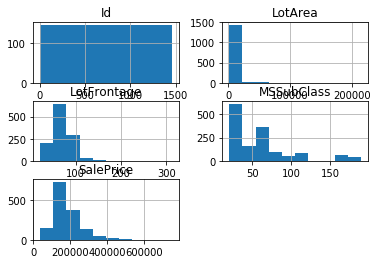

In [15]:
# Finally print the histograms of all numerical columns.
df.hist()

Now that we are done with the analysis, we start preprocessing.

In [16]:
# Drop the Id column since its probably not useful.
df.drop(['Id'], axis=1, inplace=True)

In [17]:
# Print head to be sure its been dropped
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,250000


In [18]:
# Drop a column if it has a large number of NaNs (over half of the total instances).
df.drop(['Alley'], axis=1, inplace=True)

# Print head to ensure its been dropped.
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,250000


In [19]:
# Fill up the NaNs in any columns that still have NaNs by replacing the NaNs with the mode of that column.
df['LotFrontage'].fillna(df['LotFrontage'].mode()[0], inplace=True)

In [20]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,250000


In [21]:
df['MSZoning'] = pd.factorize(df['MSZoning'])[0]
df['Street'] = pd.factorize(df['Street'])[0]
df['LotShape'] = pd.factorize(df['LotShape'])[0]
df['LandContour'] = pd.factorize(df['LandContour'])[0]

In [22]:
df.nunique()

MSSubClass       15
MSZoning          5
LotFrontage     110
LotArea        1073
Street            2
LotShape          4
LandContour       4
SalePrice       663
dtype: int64

In [23]:
# One-hot encode all the categorical variables.
categorical_variables = ['MSZoning', 'Street', 'LotShape', 'LandContour']

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(df[categorical_variables])

df = pd.concat([df.drop(categorical_variables, 1),
          pd.DataFrame(enc.transform(df[categorical_variables]))], axis=1).reindex()

In [24]:
df.head()

,MSSubClass,LotFrontage,LotArea,SalePrice,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,60,65.0,8450,208500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20,80.0,9600,181500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,60,68.0,11250,223500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,70,60.0,9550,140000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60,84.0,14260,250000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
# Convert all columns to float
for col in df.columns:
    df[col] = df[col].astype('float32')

In [26]:
# Store the target column in a separate variable and drop it from the dataframe
y = df['SalePrice']
df.drop(['SalePrice'], axis=1, inplace=True)

In [27]:
# Normalize the Dataframe

headers = df.columns

x = df.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=headers)

In [28]:
# Print the head finally to see how the data looks now
df.head()

,MSSubClass,LotFrontage,LotArea,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.235294,0.150685,0.033420,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.202055,0.038795,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.235294,0.160959,0.046507,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.294118,0.133562,0.038561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


The data is now ready for prediction!

### Welcome to Machine Learning

We will use the same data to predict the values of ```SalePrice```. This is a regression problem and so the model that we use will be a regressor and not a classifier.

The choice of model is upto you.

There are, however, certain models that seem to work better than other models in general, like SVM and Ensemble models like XGBoost and Random Forest. It is recommended to try these first before going to other models.

Before that, however, the dataset needs to be split into ```train```, ```test``` and ```val``` sets.

In [29]:
# Make a train-test split. Test size = 20% of training set.
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [30]:
# Make a train-val split. Val size = 20% of training set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [31]:
# Print shapes of each just to be sure
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((934, 18), (234, 18), (292, 18), (934,), (234,), (292,))

In [32]:
# Test any 2 models of your choice on the validation set. Metric = mean absolute error.

clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

pred = clf.predict(X_val)
mean_absolute_error(pred, y_val)

53192.85713946245

In [33]:
# Test the better model on the test set.
pred = clf.predict(X_test)
mean_absolute_error(pred, y_test)

59337.021447108295